In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
# import hdbscan
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

plt.rcParams.update({'font.size': 15})

In [2]:

path = '../data/processed/pca_inputs/final_MQT_pip.csv'
features = ['std_Log10_n0', 'std_Log10_lambda', 'std_Fs', 'std_Rho', 'std_D0', 'std_Log10_Nt']#, 'std_Sr', 'std_Ed']

df_all = pd.read_csv(path)
df_all.dropna(inplace=True)
df_all = df_all[df_all['Rho'] <= 0.4]
print(df_all)


                       time        D0        Fs       Sr      Ed       Rho  \
0       2015-01-31 02:25:00  1.132814  0.636727  0.00040  0.0172  0.056328   
1       2015-01-31 02:30:00  1.281362  0.651322  0.00100  0.0252  0.061319   
2       2015-01-31 02:35:00  1.190393  0.755232  0.00200  0.0314  0.072832   
3       2015-01-31 02:40:00  1.296959  0.763955  0.00620  0.0386  0.090365   
4       2015-01-31 02:45:00  1.076994  0.706140  0.00100  0.0286  0.083830   
...                     ...       ...       ...      ...     ...       ...   
102982  2022-11-16 23:15:00  1.241243  1.047934  0.14544  0.1498  0.138085   
102983  2022-11-16 23:20:00  1.177725  0.963709  0.10484  0.1528  0.121773   
102984  2022-11-16 23:25:00  1.199251  1.004646  0.04398  0.1374  0.128932   
102985  2022-11-16 23:30:00  1.172974  1.016566  0.00874  0.1144  0.132962   
102986  2022-11-16 23:35:00  1.006514  1.044354  0.00266  0.1258  0.156812   

        Log10_n0  Log10_lambda  Log10_Nt  std_Log10_n0  std_Log

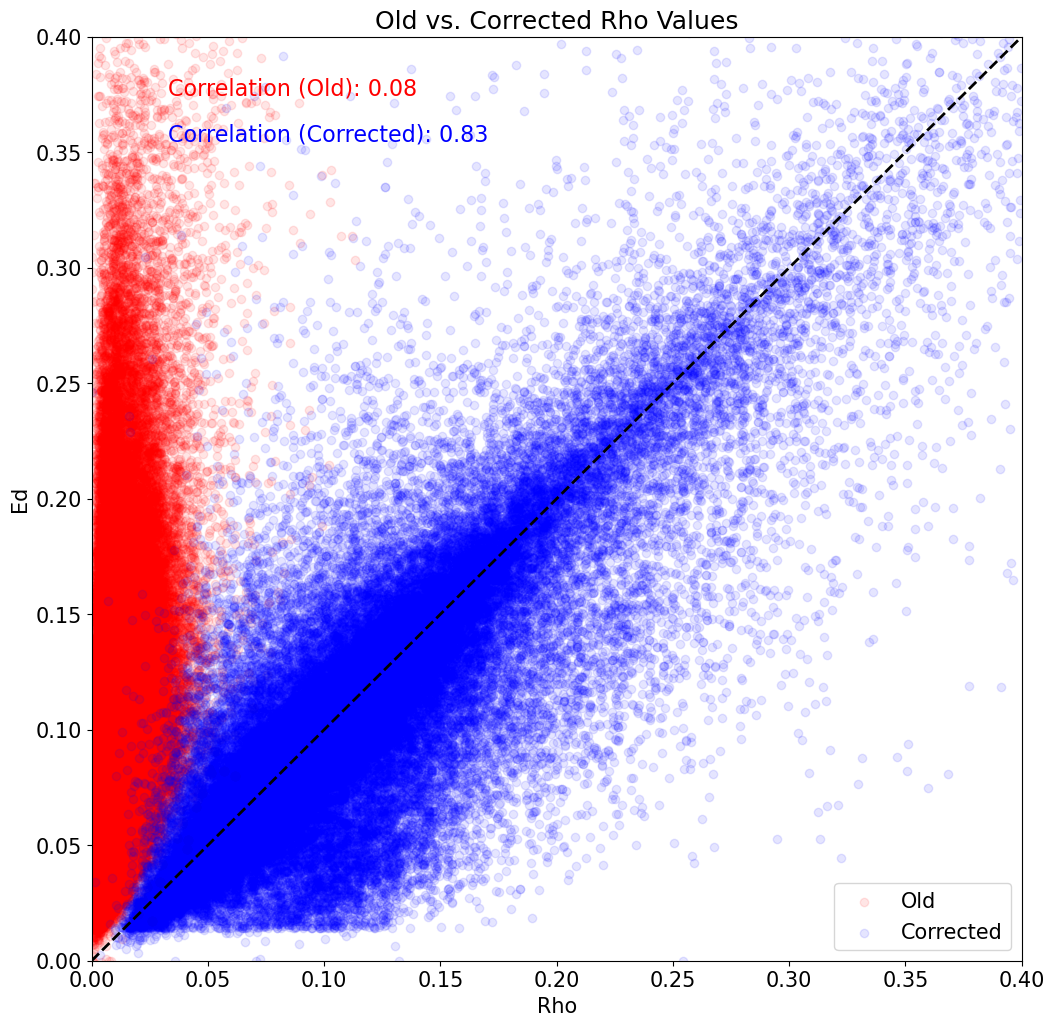

In [3]:
rho = df_all['Rho'].values
ed = df_all['Ed'].values

path = '../data/processed/pca_inputs/MQT_with_bad_rho.csv'
df_bad = pd.read_csv(path)
df_bad.dropna(inplace=True)
df_bad = df_bad[df_bad['Rho2'] <= 0.4]

rho2 = df_bad['Rho'].values
ed2 = df_bad['Ed'].values
correlation1, _ = pearsonr(rho2, ed2)
correlation2, _ = pearsonr(rho, ed)

fig, ax = plt.subplots(figsize=(12,12))
plt.xlabel('Rho')
plt.ylabel('Ed')
plt.title('Old vs. Corrected Rho Values')
plt.scatter(rho2, ed2, c='red', alpha=0.1, label='Old')
plt.scatter(rho, ed, c='blue', alpha=0.1, label='Corrected')
plt.xlim((0, 0.4))
plt.ylim((0, 0.4))
plt.plot([0,0.4], [0,0.4], linewidth=2, linestyle='--', color='black')
ax.text(0.033, 0.375, f"Correlation (Old): {correlation1:.2f}", color='red', fontsize=16)
ax.text(0.033, 0.355, f"Correlation (Corrected): {correlation2:.2f}", color='blue', fontsize=16)
plt.legend()
plt.show()




In [4]:

print(df_all.loc[:, features])
scaled_data = df_all.loc[:, features].values

        std_Log10_n0  std_Log10_lambda    std_Fs   std_Rho    std_D0  \
0          -1.425087         -0.793927 -0.748078 -0.733314 -0.466778   
1          -1.459984         -0.908679 -0.737899 -0.716269 -0.325702   
2          -0.902443         -0.615390 -0.665422 -0.676949 -0.412095   
3          -0.625370         -0.368877 -0.659338 -0.617072 -0.310890   
4          -0.995253          0.039681 -0.699663 -0.639390 -0.519790   
...              ...               ...       ...       ...       ...   
102982      0.524506         -0.402082 -0.461265 -0.454097 -0.363803   
102983      0.625044         -0.111063 -0.520011 -0.509807 -0.424126   
102984      0.570863         -0.136755 -0.491458 -0.485357 -0.403682   
102985      0.578684         -0.002614 -0.483144 -0.471593 -0.428638   
102986      0.618330          0.052136 -0.463762 -0.390142 -0.586725   

        std_Log10_Nt  
0          -1.441740  
1          -1.461341  
2          -0.898319  
3          -0.627571  
4          -1.099195

In [5]:
pca = PCA(n_components = 0.95)
pca.fit(scaled_data)
reduced = pca.transform(scaled_data)

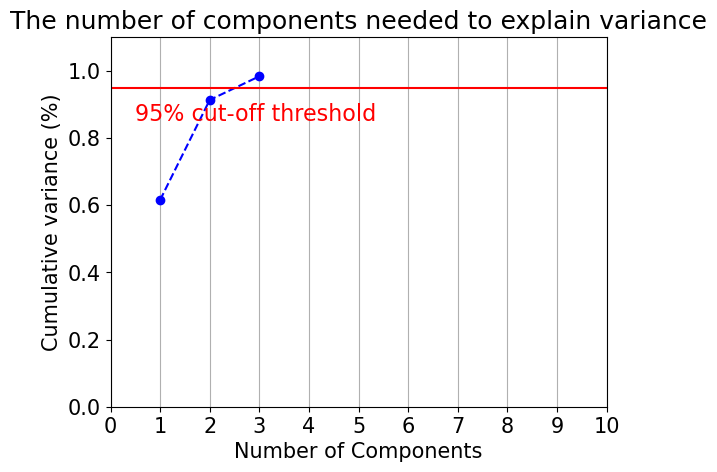

In [6]:
fig, ax = plt.subplots()
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [7]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['eof1', 'eof2', 'eof3'])

df_all = df_all.reset_index(drop=True)
principalDf = principalDf.reset_index(drop=True)
df_combo = pd.concat([df_all, principalDf], axis=1)
print(pca.explained_variance_ratio_)
print(df_combo)



[0.61516973 0.29779268 0.07044659]
                      time        D0        Fs       Sr      Ed       Rho  \
0      2015-01-31 02:25:00  1.132814  0.636727  0.00040  0.0172  0.056328   
1      2015-01-31 02:30:00  1.281362  0.651322  0.00100  0.0252  0.061319   
2      2015-01-31 02:35:00  1.190393  0.755232  0.00200  0.0314  0.072832   
3      2015-01-31 02:40:00  1.296959  0.763955  0.00620  0.0386  0.090365   
4      2015-01-31 02:45:00  1.076994  0.706140  0.00100  0.0286  0.083830   
...                    ...       ...       ...      ...     ...       ...   
79184  2022-11-16 23:15:00  1.241243  1.047934  0.14544  0.1498  0.138085   
79185  2022-11-16 23:20:00  1.177725  0.963709  0.10484  0.1528  0.121773   
79186  2022-11-16 23:25:00  1.199251  1.004646  0.04398  0.1374  0.128932   
79187  2022-11-16 23:30:00  1.172974  1.016566  0.00874  0.1144  0.132962   
79188  2022-11-16 23:35:00  1.006514  1.044354  0.00266  0.1258  0.156812   

       Log10_n0  Log10_lambda  Log10_Nt 

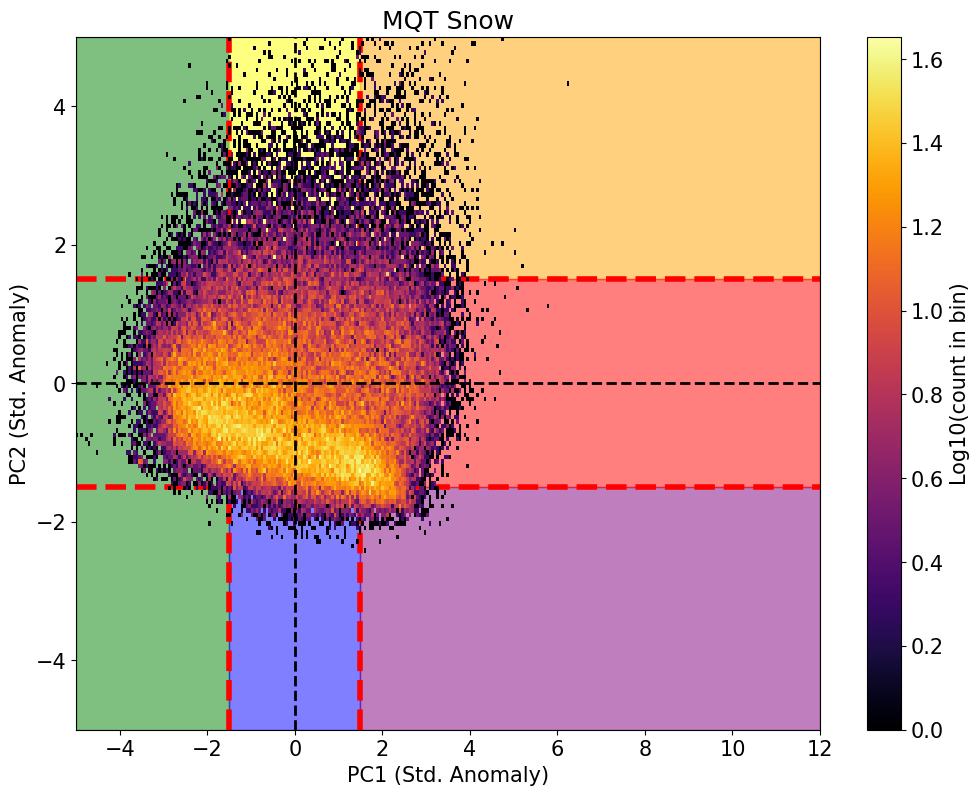

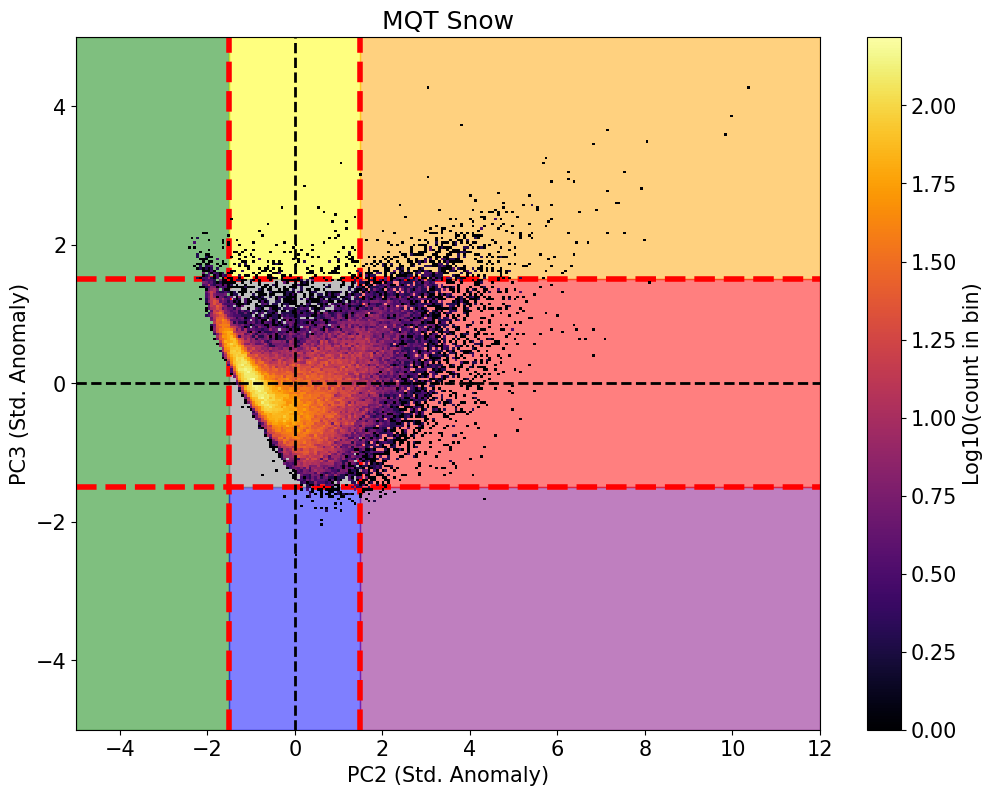

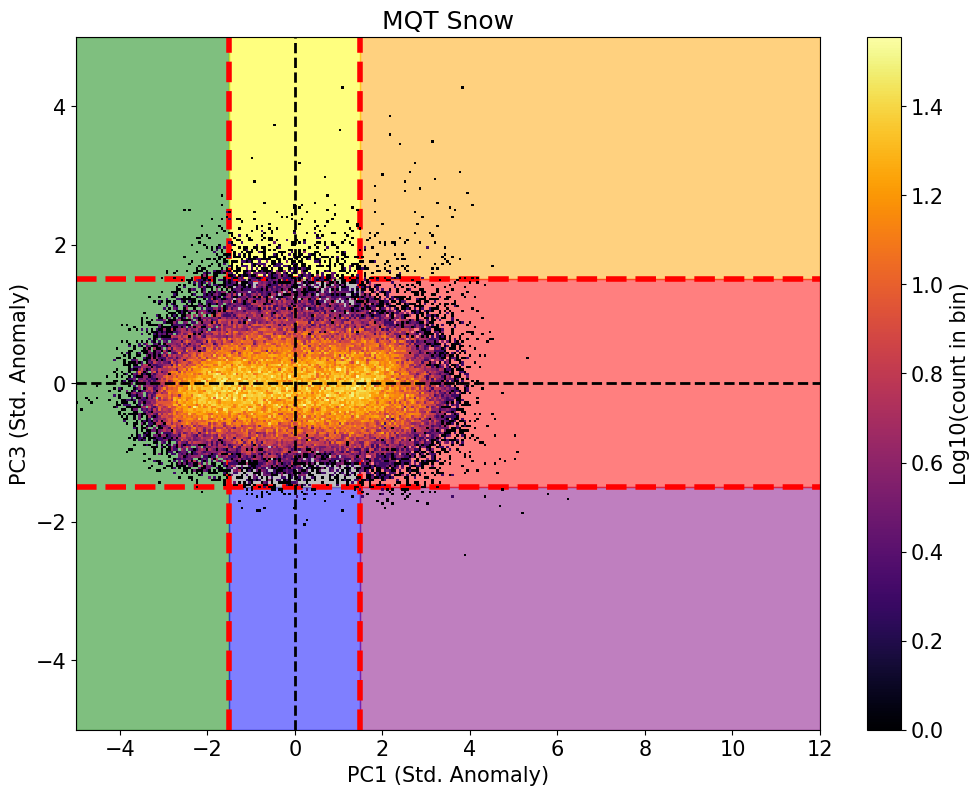

In [8]:

sigma = 1.5

def make_pca_plot(pc_a, pc_b, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(12,9))
    ax.set_facecolor('white')

    plt.title('MQT Snow')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.axvline(-sigma, linewidth=4, color='red', linestyle='--')
    plt.axvline(sigma, linewidth=4, color='red', linestyle='--')
    plt.axhline(-sigma, linewidth=4, color='red', linestyle='--')
    plt.axhline(sigma, linewidth=4, color='red', linestyle='--')
    plt.axhline(0, linewidth=2, color='black', linestyle='--', zorder=1001)
    plt.axvline(0, linewidth=2, color='black', linestyle='--', zorder=1001)

    plt.fill_between([-5, -sigma], -5, 5, color='green', alpha=0.5)
    plt.fill_between([-sigma, sigma], -5, -sigma, color='blue', alpha=0.5)
    plt.fill_between([-sigma, sigma], 5, sigma, color='yellow', alpha=0.5)
    plt.fill_between([sigma, 12], -5, -sigma, color='purple', alpha=0.5)
    plt.fill_between([sigma, 12], sigma, 5, color='orange', alpha=0.5)
    plt.fill_between([sigma, 12], -sigma, sigma, color='red', alpha=0.5)
    plt.fill_between([-sigma, sigma], -sigma, sigma, color='gray', alpha=0.5)
    plt.xlim((-5, 12))
    plt.ylim((-5, 5))

    counts, xedges, yedges = np.histogram2d(pc_a, pc_b, bins=200)
    counts = np.where(counts<1, np.nan, counts)

    counts = np.log10(counts)
    pcm = ax.pcolormesh(xedges, yedges, counts.T, cmap='inferno', rasterized=True, zorder=1000)

    cbar = plt.colorbar(pcm, ax=ax, label='Log10(count in bin)')
    cbar.ax.minorticks_off()  # turn off minor ticks on the colorbar

    plt.show()

make_pca_plot(principalDf.eof1, principalDf.eof2, 'PC1 (Std. Anomaly)', 'PC2 (Std. Anomaly)')
make_pca_plot(principalDf.eof2, principalDf.eof3, 'PC2 (Std. Anomaly)', 'PC3 (Std. Anomaly)')
make_pca_plot(principalDf.eof1, principalDf.eof3, 'PC1 (Std. Anomaly)', 'PC3 (Std. Anomaly)')


In [9]:
#TODO: Group points based on First EOF groupings above

# define ranges for eof1 and eof2
ranges = {
    1: [[-np.inf, -sigma], [-np.inf, np.inf]],
    2: [[-sigma, sigma], [-np.inf, -sigma]],
    3: [[-sigma, sigma], [sigma, np.inf]],
    4: [[sigma, np.inf], [-np.inf, -sigma]],
    5: [[sigma, np.inf], [-sigma, sigma]],
    6: [[sigma, np.inf], [sigma, np.inf]]
}

# define function to assign group based on eof1 and eof2 values
def assign_group(row):
    for group, (range1, range2) in ranges.items():
        if range1[0] <= row['eof1'] <= range1[1] and range2[0] <= row['eof2'] <= range2[1]:
            return group
    # if not in any range, return 7
    return 7

# apply function to each row in dataframe
df_combo['group'] = df_combo.apply(assign_group, axis=1)

print(df_combo)


                      time        D0        Fs       Sr      Ed       Rho  \
0      2015-01-31 02:25:00  1.132814  0.636727  0.00040  0.0172  0.056328   
1      2015-01-31 02:30:00  1.281362  0.651322  0.00100  0.0252  0.061319   
2      2015-01-31 02:35:00  1.190393  0.755232  0.00200  0.0314  0.072832   
3      2015-01-31 02:40:00  1.296959  0.763955  0.00620  0.0386  0.090365   
4      2015-01-31 02:45:00  1.076994  0.706140  0.00100  0.0286  0.083830   
...                    ...       ...       ...      ...     ...       ...   
79184  2022-11-16 23:15:00  1.241243  1.047934  0.14544  0.1498  0.138085   
79185  2022-11-16 23:20:00  1.177725  0.963709  0.10484  0.1528  0.121773   
79186  2022-11-16 23:25:00  1.199251  1.004646  0.04398  0.1374  0.128932   
79187  2022-11-16 23:30:00  1.172974  1.016566  0.00874  0.1144  0.132962   
79188  2022-11-16 23:35:00  1.006514  1.044354  0.00266  0.1258  0.156812   

       Log10_n0  Log10_lambda  Log10_Nt  std_Log10_n0  ...    std_Ed  \
0  

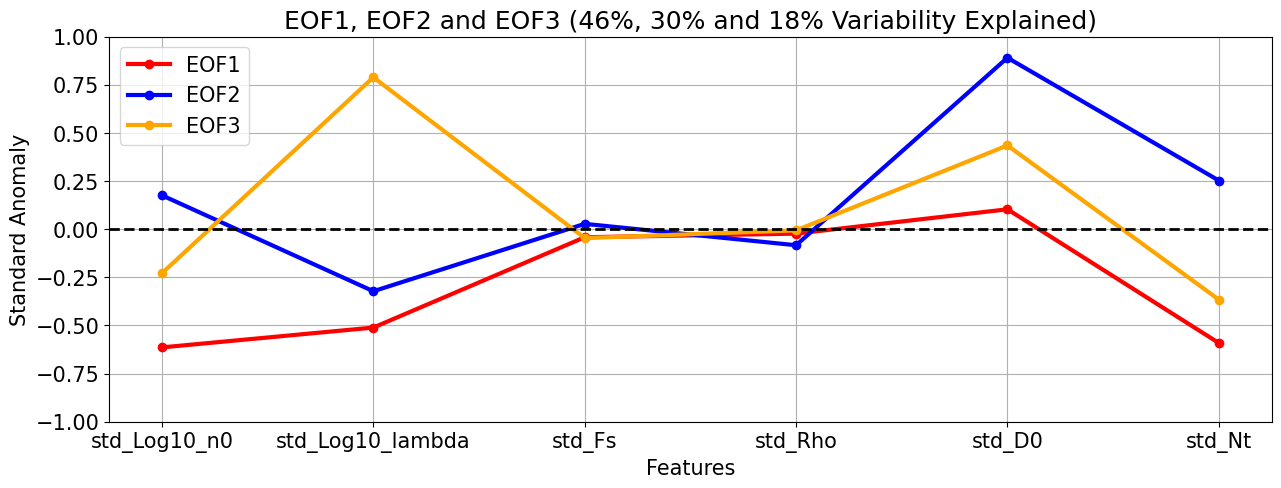

In [15]:
loadings = pd.DataFrame(pca.components_.T, columns=['EOF1', 'EOF2', 'EOF3'], index=['std_Log10_n0', 'std_Log10_lambda', 'std_Fs', 'std_Rho', 'std_D0', 'std_Nt'])#, 'std_Sr', 'std_Ed'])

fig, ax = plt.subplots(figsize=(15,5))

# Generate line plots
ax.plot(loadings['EOF1'], marker='o', color='red', linewidth=3, label='EOF1')
ax.plot(loadings['EOF2'], marker='o', color='blue', linewidth=3, label='EOF2')
ax.plot(loadings['EOF3'], marker='o', color='orange', linewidth=3, label='EOF3')

ax.set_title('EOF1, EOF2 and EOF3 (46%, 30% and 18% Variability Explained)')
ax.set_ylabel('Standard Anomaly')
ax.set_xlabel('Features')
ax.grid(True)
ax.set_ylim((-1, 1))
ax.axhline(0, linewidth=2, linestyle='--', color='black')
ax.legend()

plt.show()

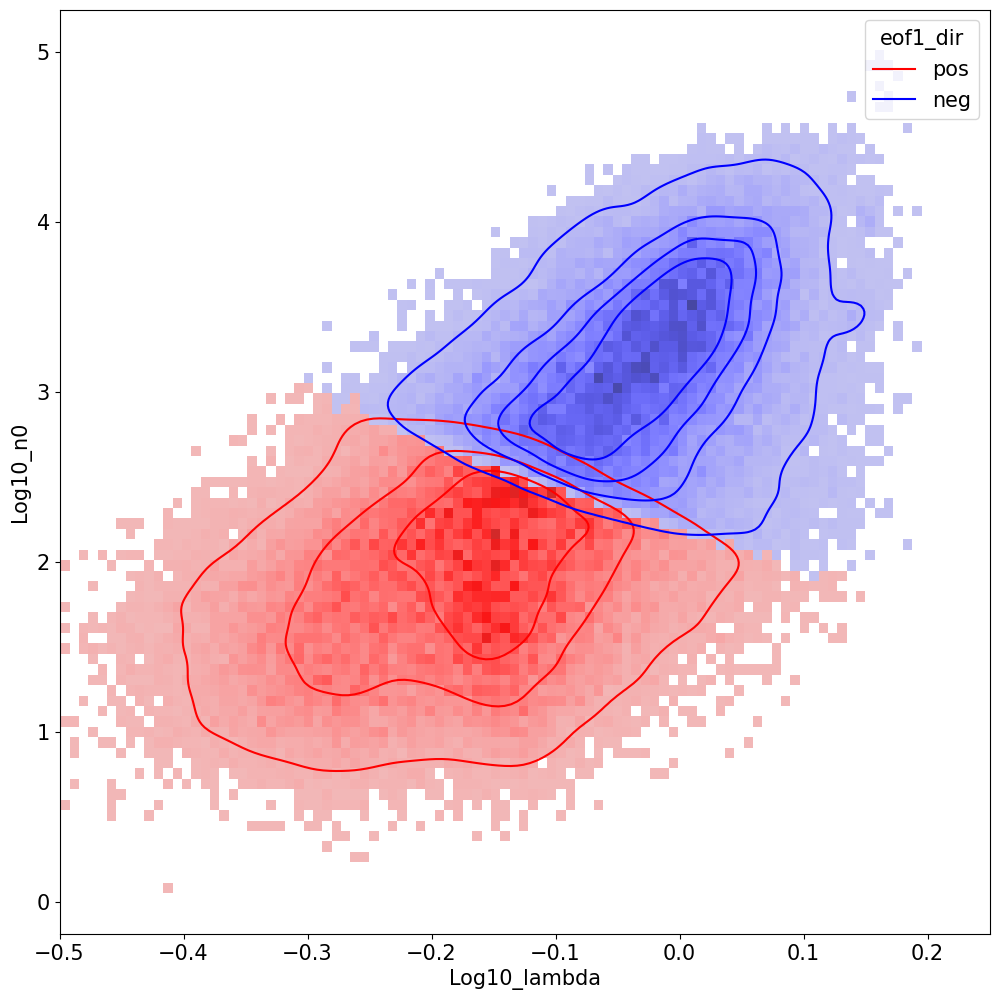

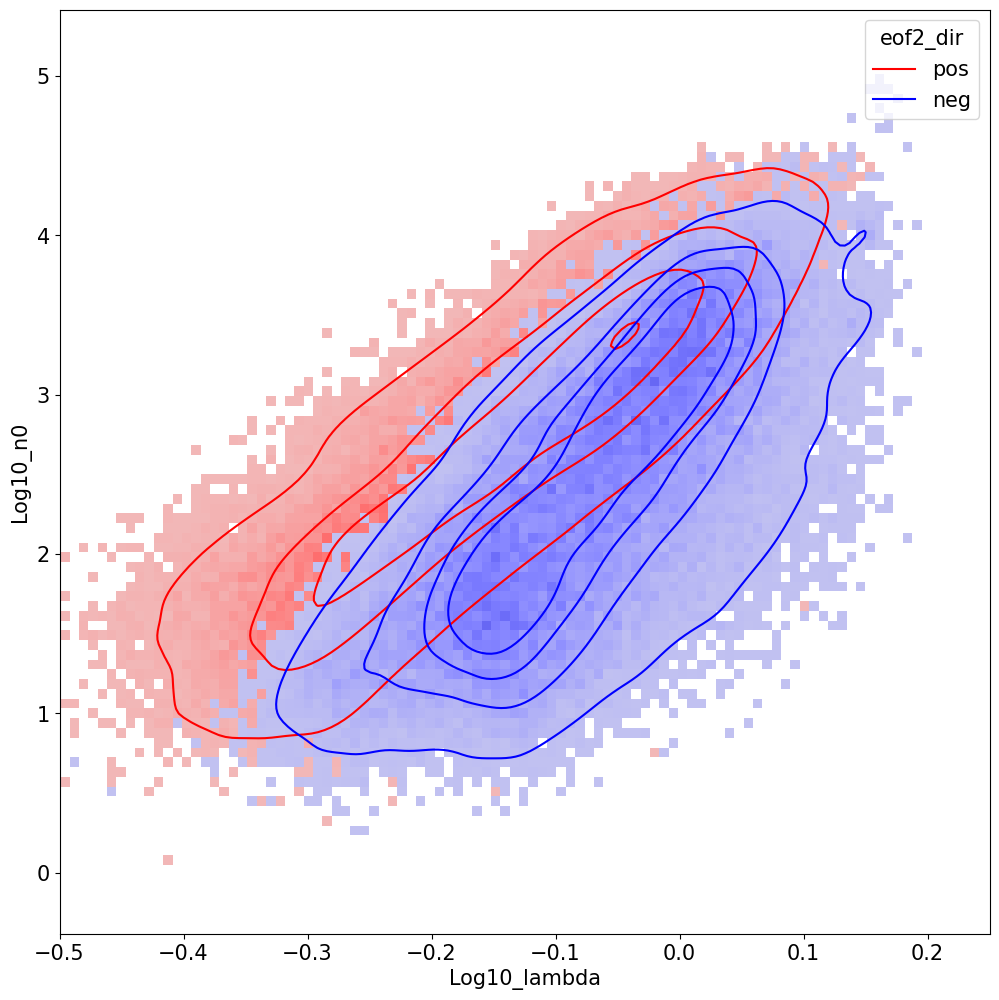

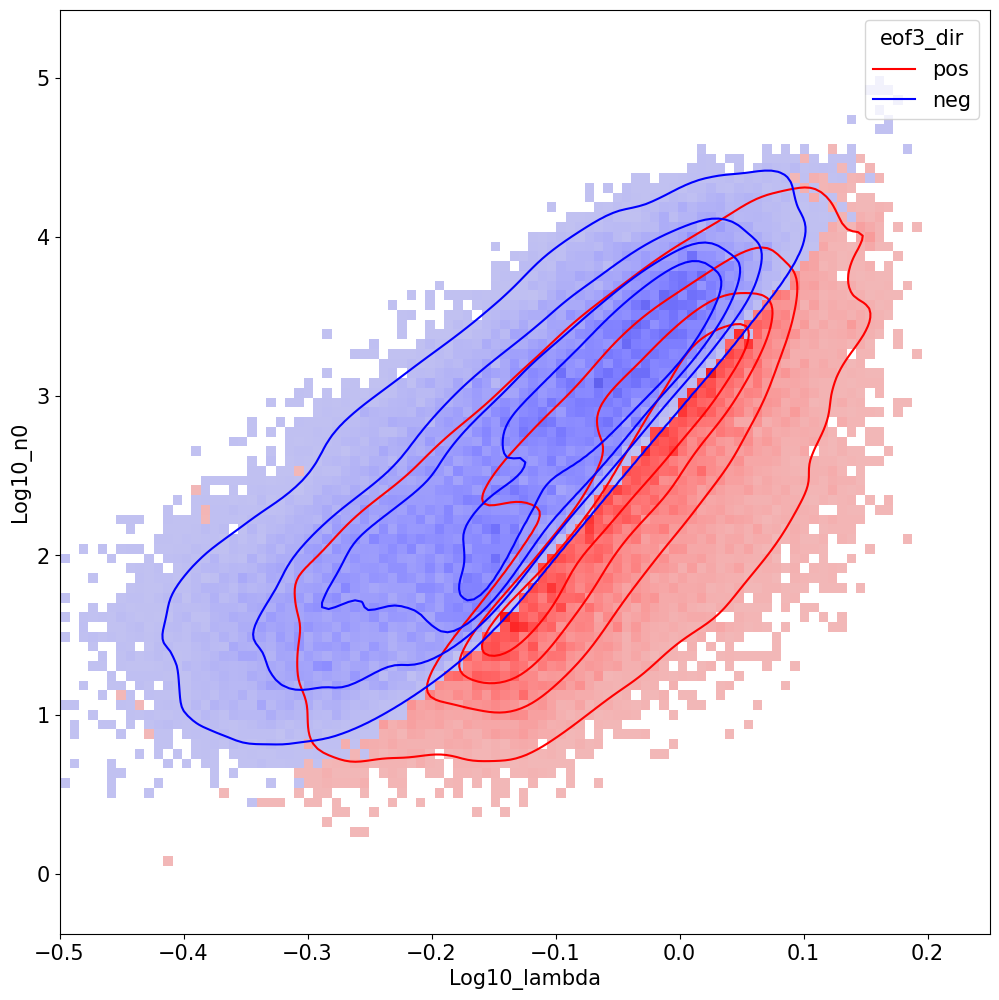

In [12]:

df_combo['eof1_dir'] = df_combo['eof1'].apply(lambda x: 'pos' if x > 0 else 'neg')
df_combo['eof2_dir'] = df_combo['eof2'].apply(lambda x: 'pos' if x > 0 else 'neg')
df_combo['eof3_dir'] = df_combo['eof3'].apply(lambda x: 'pos' if x > 0 else 'neg')


fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim((-0.5, 0.25))
sns.histplot(df_combo, x="Log10_lambda", y="Log10_n0", hue="eof1_dir", hue_order=['pos', 'neg'], palette={'pos':'red', 'neg':'blue'})
sns.kdeplot(df_combo, x="Log10_lambda", y="Log10_n0", hue="eof1_dir", hue_order=['pos', 'neg'], levels=5, palette={'pos':'red', 'neg':'blue'})
plt.show()

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim((-0.5, 0.25))
sns.histplot(df_combo, x="Log10_lambda", y="Log10_n0", hue="eof2_dir", hue_order=['pos', 'neg'], palette={'pos':'red', 'neg':'blue'})
sns.kdeplot(df_combo, x="Log10_lambda", y="Log10_n0", hue="eof2_dir", hue_order=['pos', 'neg'], levels=5, palette={'pos':'red', 'neg':'blue'})
plt.show()

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim((-0.5, 0.25))
sns.histplot(df_combo, x="Log10_lambda", y="Log10_n0", hue="eof3_dir", hue_order=['pos', 'neg'], palette={'pos':'red', 'neg':'blue'})
sns.kdeplot(df_combo, x="Log10_lambda", y="Log10_n0", hue="eof3_dir", hue_order=['pos', 'neg'], levels=5, palette={'pos':'red', 'neg':'blue'})
plt.show()



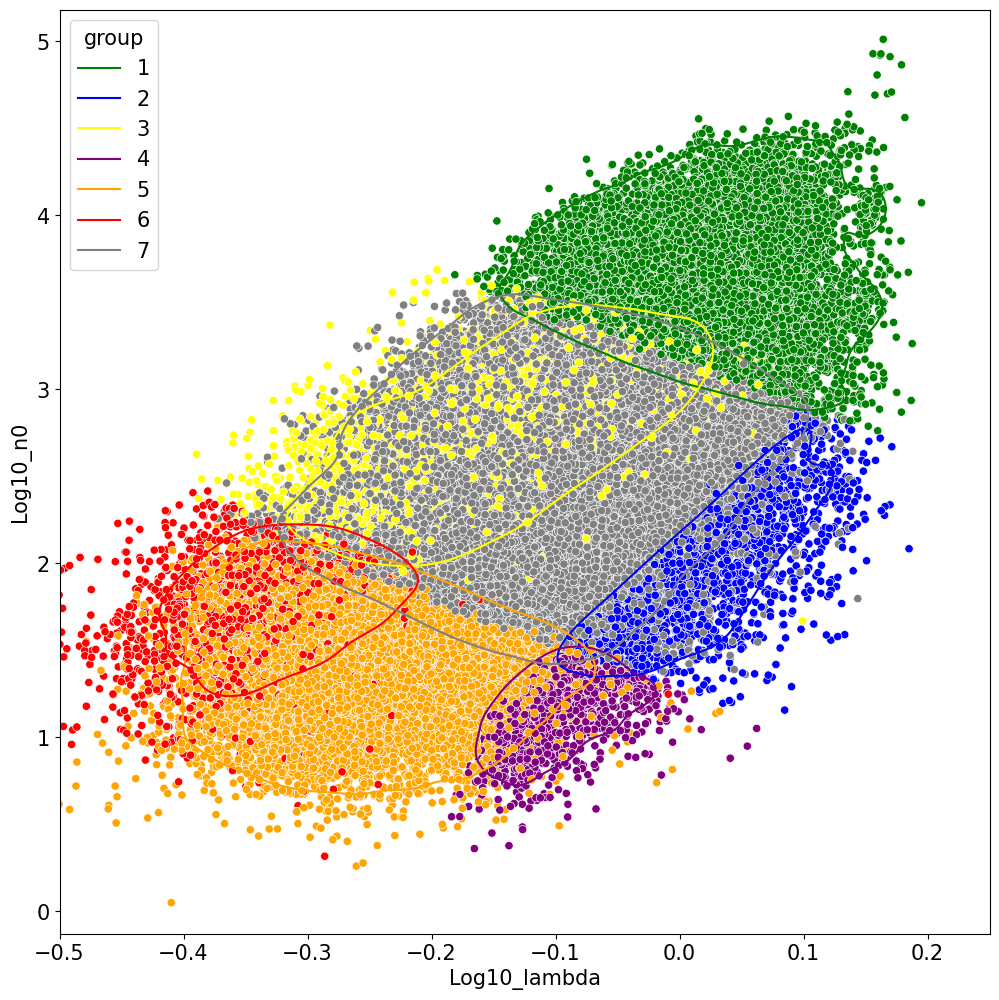

In [13]:

color_dict = {1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple', 5: 'orange', 6: 'red', 7: 'gray'}


fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim((-0.5, 0.25))
# sns.histplot(df_combo, x="Log10_lambda", y="Log10_n0", hue="group")
sns.scatterplot(data=df_combo, x="Log10_lambda", y="Log10_n0",  hue_order=[1, 2, 3, 4, 5, 6, 7], hue="group", palette=color_dict)
sns.kdeplot(data=df_combo, x="Log10_lambda", y="Log10_n0", levels=2, hue="group",  hue_order=[1, 2, 3, 4, 5, 6, 7], palette=color_dict)

plt.show()

In [14]:

# colors = ['green', 'blue', 'yellow', 'purple', 'orange', 'red', 'gray']
# func = lambda t, a, b: a * np.exp(-b*t)
# df_combo['n0'] = 10**df_combo['Log10_n0']
# df_combo['lambda'] = 10**df_combo['Log10_lambda']

# plt.figure(figsize=(14, 6))
# plt.yscale('log')

# for i in range(7):
#     df_group = df_combo[df_combo['group'] == i+1]
#     mean_n0 = df_group.loc[:, 'n0'].mean()
#     mean_lambda = df_group.loc[:, 'lambda'].mean()

#     t = np.linspace(0, 8, 500)
#     y = func(t, mean_n0, mean_lambda)
#     plt.plot(t, y, colors[i], linewidth=4)

# plt.xlabel('Diameter (mm)')
# plt.ylabel('N(D) m$^{-3}$ mm$^{-1}$')
# plt.title('Mean Particle Size Distributions')
# plt.show()


# plt.figure(figsize=(14, 6))
# for i in range(7):
#     df_group = df_combo[df_combo['group'] == i+1]
#     mean_n0 = df_group.loc[:, 'std_Log10_n0'].mean()
#     mean_lambda = df_group.loc[:, 'std_Log10_lambda'].mean()
#     mean_Nt = df_group.loc[:, 'std_Nt'].mean()
#     mean_Fs = df_group.loc[:, 'std_Fs'].mean()
#     mean_Rho = df_group.loc[:, 'std_Rho'].mean()
#     mean_D0 = df_group.loc[:, 'std_D0'].mean()
#     mean_Sr = df_group.loc[:, 'std_Sr'].mean()
#     mean_Ed = df_group.loc[:, 'std_Ed'].mean()

#     cols = ['std_Log10_n0', 'std_Log10_lambda', 'std_Fs', 'std_Rho', 'std_D0', 'std_Nt', 'std_Sr', 'std_Ed']
#     plt.plot(cols, [mean_n0, mean_lambda, mean_Fs, mean_Rho, mean_D0, mean_Nt, mean_Sr, mean_Ed ], colors[i], linewidth=4)

# plt.xlabel('Inputs')
# plt.ylabel('Normalized Means')
# plt.title('Normalized Mean Parameters')
# plt.show()

